In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
raw_data_frame = pd.read_csv(r"Z:\\projects\\ez_money\\raw_data_30m\\EURUSD_M30.csv", sep='\t')

In [17]:
raw_data_frame

,Time,Open,High,Low,Close,Volume
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612
...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963
199996,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103
199997,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513
199998,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894


In [18]:
# dataframe for close price to calculate 200 ema
close_price = raw_data_frame.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis=1)


In [19]:
# calculating 200 ema using ewm method in pd
def calculate_ema_200(data, n):
    ema = data.Close.ewm(span=n, adjust=False).mean()
    return ema
ema_200 = calculate_ema_200(close_price, 200)


In [20]:
ema_200 = ema_200.round(3)
ema_200

0         1.293
1         1.293
2         1.293
3         1.293
4         1.293
          ...  
199995    1.074
199996    1.074
199997    1.074
199998    1.074
199999    1.074
Name: Close, Length: 200000, dtype: float64

In [21]:
# making final dataframe with close price, 200 ema, volume
final_data_frame = raw_data_frame.drop(['Time', 'Open', 'High', 'Low'], axis=1)
final_data_frame['ema_200'] = ema_200


In [22]:
final_data_frame

,Close,Volume,ema_200
0,1.29273,277811,1.293
1,1.29304,157253,1.293
2,1.29336,106005,1.293
3,1.29297,99885,1.293
4,1.29266,68612,1.293
...,...,...,...
199995,1.06712,3963,1.074
199996,1.06744,5103,1.074
199997,1.06730,3513,1.074
199998,1.06783,2894,1.074


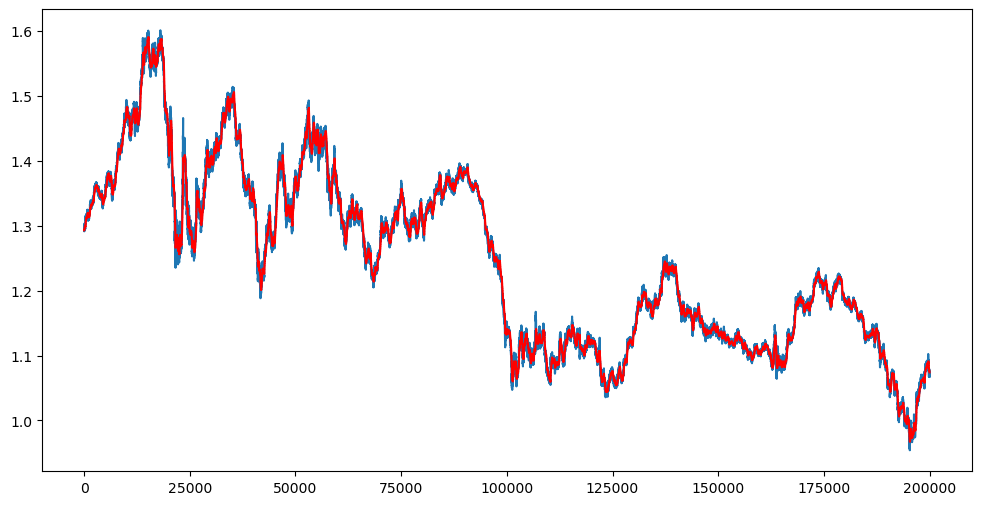

In [23]:
plt.figure(figsize=(12,6))
plt.plot(final_data_frame.Close)
plt.plot(final_data_frame.ema_200, 'r')


In [24]:
# making a Trend column for binary classification of the trend so as to decrease noise  
final_data_frame['Trend'] = [1 if row['Close'] > row['ema_200'] + 0.001 * row['Close']
                        else -1 if row['Close'] < row['ema_200'] - 0.001 * row['Close']
                        else 0 for index, row in final_data_frame.iterrows()]


In [25]:
final_data_frame

,Close,Volume,ema_200,Trend
0,1.29273,277811,1.293,0
1,1.29304,157253,1.293,0
2,1.29336,106005,1.293,0
3,1.29297,99885,1.293,0
4,1.29266,68612,1.293,0
...,...,...,...,...
199995,1.06712,3963,1.074,-1
199996,1.06744,5103,1.074,-1
199997,1.06730,3513,1.074,-1
199998,1.06783,2894,1.074,-1


In [27]:
final_data_frame.to_csv(r"Z:\\projects\\ez_money\\pre_processed_data\\"+'EURUSD_M30.csv')

In [2]:
# loading final dataframe directly
final_data_frame = pd.read_csv('Z:\projects\ez_money\pre_processed_data\GBPJPY_M30.csv')

In [7]:
final_data_frame = final_data_frame.drop('Unnamed: 0', axis=1)

In [8]:
final_data_frame
# currently eurusd

,Close,Volume,ema_200,Trend
0,236.522,1489,236.522,0
1,236.281,1590,236.520,-1
2,236.468,1711,236.519,0
3,236.253,1546,236.516,-1
4,236.109,1474,236.512,-1
...,...,...,...,...
199995,158.555,2379,158.762,-1
199996,158.484,2185,158.759,-1
199997,158.450,2411,158.756,-1
199998,158.426,1599,158.753,-1


START FROM HERE

In [40]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# import joblib

In [41]:
# # splitting data into features x and labels y
# x = final_data_frame[['Close', 'Volume', 'ema_200']]
# y = final_data_frame['Trend']

In [42]:
# # making traing and testing dataframes with 80 20 ratio, and random state 0
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [43]:
# x_train

In [44]:
# # training the model
# dt_classifier = DecisionTreeClassifier()
# dt_classifier.fit(x_train, y_train) 

In [45]:
# # accuracy
# model_acc = dt_classifier.score(x_test, y_test)
# print('Acc = ', model_acc)


In [46]:
# model = dt_classifier
# joblib.dump(model, 'model.joblib')


In [47]:
# # testing on new data
# new_data = final_data_frame[['Close', 'Volume', 'ema_200']]
# predictions = dt_classifier.predict(new_data)
# print("Prediction: ", predictions)

LSTM

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [93]:
# scaling data to 0 to 1
scaler.fit(final_data_frame)
normalised_df = scaler.transform(final_data_frame)

In [94]:
normalised_df

array([[0.52327341, 0.14909641, 0.5224359 , 0.5       ],
       [0.52375216, 0.08439476, 0.5224359 , 0.5       ],
       [0.52424636, 0.05689074, 0.5224359 , 0.5       ],
       ...,
       [0.17512973, 0.00188484, 0.17147436, 0.        ],
       [0.17594823, 0.00155263, 0.17147436, 0.        ],
       [0.17602545, 0.00129287, 0.17147436, 0.        ]])

In [95]:
# splitting the data for features and label
x = normalised_df[:, :-1]
y = normalised_df[:, -1] 

In [138]:
x.shape

(200000, 3)

In [140]:
# tts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [141]:
x_train

array([[0.25588399, 0.00492623, 0.24839744],
       [0.45893563, 0.00386091, 0.46314103],
       [0.29382876, 0.00705848, 0.28205128],
       ...,
       [0.36834383, 0.0012011 , 0.34455128],
       [0.29222263, 0.00196534, 0.28044872],
       [0.23627069, 0.00528259, 0.22435897]])

In [149]:
x_train.shape

(160000, 1, 3)

In [157]:
# formatting the dataframe to fit into LSTM compaitable format
timesteps = 3
x_train = np.array(x_train).reshape(x_train.shape[0],  timesteps, x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], timesteps, x_test.shape[1])

### timestep should be 30 but error

In [158]:
x_train

array([[[0.25588399],
        [0.00492623],
        [0.24839744]],

       [[0.45893563],
        [0.00386091],
        [0.46314103]],

       [[0.29382876],
        [0.00705848],
        [0.28205128]],

       ...,

       [[0.36834383],
        [0.0012011 ],
        [0.34455128]],

       [[0.29222263],
        [0.00196534],
        [0.28044872]],

       [[0.23627069],
        [0.00528259],
        [0.22435897]]])

In [159]:
y_train = np.array(y_train).reshape(y_train.shape[0],  1, 1)
y_test = np.array(y_test).reshape(y_test.shape[0], 1, 1)

In [163]:
y_test.shape



(40000, 1, 1)

In [128]:
# training the model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense

In [111]:
model = Sequential()

In [123]:
# # Add an LSTM layer
model.add(CuDNNLSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])))

In [124]:
# Add a dense layer with a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [125]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [126]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5000/5000 [==============================] - 58s 11ms/step - loss: 0.6908 - accuracy: 0.4447 - val_loss: 0.6906 - val_accuracy: 0.4431
Epoch 2/100
5000/5000 [==============================] - 52s 10ms/step - loss: 0.6899 - accuracy: 0.4520 - val_loss: 0.6902 - val_accuracy: 0.4518
Epoch 3/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.6772 - accuracy: 0.4784 - val_loss: 0.5152 - val_accuracy: 0.6659
Epoch 4/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.2848 - accuracy: 0.7970 - val_loss: 0.1849 - val_accuracy: 0.8354
Epoch 5/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.2050 - accuracy: 0.8235 - val_loss: 0.1783 - val_accuracy: 0.8336
Epoch 6/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.1922 - accuracy: 0.8271 - val_loss: 0.1934 - val_accuracy: 0.8296
Epoch 7/100
5000/5000 [==============================] - 54s 11ms/step - loss: 0.1912 - accuracy: 0.8271 - val_loss: 0

In [133]:
model.save('Z:\\projects\\ez_money\\models\\200_ema_30m.h5')

In [160]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15347905457019806
Test accuracy: 0.8372250199317932
